# Fitzhugh Nagumo Model

In [5]:
import uncertainpy as un
import chaospy as cp #STUPID PACKAGE

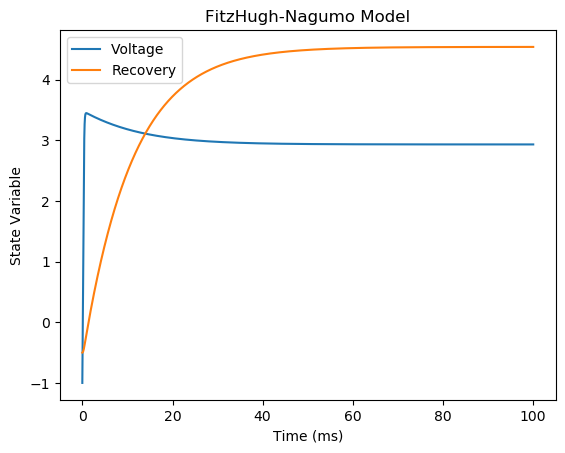

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def fitzhugh_nagumoM (a=0.7, b=0.8, c=10):
    # Define the FitzHugh-Nagumo model equations
    
    def fitzhugh_nagumo(x, t, a, b, c):
        v, w = x
        dvdt = v - (v**3 / 3) - w + c
        dwdt = (v + a - b * w) / c
        return [dvdt, dwdt]

    # Define the simulation time and initial conditions
    t = np.linspace(0, 100, 10000)
    x0 = [-1.0, -0.5]

    # Solve the differential equations numerically using SciPy's odeint function
    from scipy.integrate import odeint
    sol = odeint(fitzhugh_nagumo, x0, t, args=(a, b, c))

    # Extract the voltage and recovery variable from the simulation results
    voltage = sol[:, 0]
    recovery = sol[:, 1]
    
    return t, voltage, recovery

time, voltage, recovery=fitzhugh_nagumoM()


# Plot the results
plt.plot(time, voltage, label='Voltage')
plt.plot(time, recovery, label='Recovery')
plt.xlabel('Time (ms)')
plt.ylabel('State Variable')
plt.title('FitzHugh-Nagumo Model')
plt.legend()
plt.show()


In [6]:
model = un.Model(run=fitzhugh_nagumoM,
                 labels=["Time (ms)", "Membrane potential (mV)"])

In [7]:
# Define a parameter dictionary
parameters = {"a": 0.7,
              "b": 0.8,
              "c": 10}

# Create the parameters
parameters = un.Parameters(parameters)
parameters.set_all_distributions(un.uniform(0.2))

In [8]:
UQ = un.UncertaintyQuantification(model,parameters=parameters)

In [9]:
#In teoria ora dovrebbe funzionare solo per le prede
%timeit

# We set the seed to easier be able to reproduce the result
data = UQ.quantify(seed=10, method="mc")

/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (5000) is equal to `2^n`.
        
  warnings.warn(msg)
Running model: 100%|██████████| 25000/25000 [00:22<00:00, 1109.05it/s]
/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/analyze/sobol.py:161: RuntimeWarning: invalid value encountered in divide
  return np.mean(B * (AB - A), axis=0) / np.var(np.r_[A, B], axis=0)
/Users/fl.hi1/opt/anaconda3/envs/Computational_statistics/lib/python3.9/site-packages/SALib/analyze/sobol.py:169: RuntimeWarning: invalid value encountered in divide
  return 0.5 * np.mean((A - AB) ** 2, axis=0) / np.var(np.r_[A, B], axis=0)


Saving data as: data/fitzhugh_nagumoM.h5
